<a href="https://colab.research.google.com/github/SujayVivek/TradingStrategies/blob/main/Stochastic%2BRSI%2BMACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=09fc58ed1b4e846354957c6c7295cd3c4e9bc7c2f4f38f8457a65f412c529be0
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
import yfinance as yf
import numpy as np
import ta
from google.colab import files


In [3]:
files.upload()

Saving NIFTY 50-01-01-2023-to-31-12-2023.csv to NIFTY 50-01-01-2023-to-31-12-2023.csv


{'NIFTY 50-01-01-2023-to-31-12-2023.csv': b'\xef\xbb\xbfDate ,Open ,High ,Low ,Close ,Shares Traded ,Turnover (\xe2\x82\xb9 Cr)\n02-JAN-2023,18131.7,18215.15,18086.5,18197.45,256073979,11793.06\n03-JAN-2023,18163.2,18251.95,18149.8,18232.55,208699772,13680.91\n04-JAN-2023,18230.65,18243,18020.6,18042.95,235162202,16687.71\n05-JAN-2023,18101.95,18120.3,17892.6,17992.15,269949738,22108.53\n06-JAN-2023,18008.05,18047.4,17795.55,17859.45,238220578,17495.25\n09-JAN-2023,17952.55,18141.4,17936.15,18101.2,257237669,19916.16\n10-JAN-2023,18121.3,18127.6,17856,17914.15,283277918,20570.3\n11-JAN-2023,17924.25,17976.35,17824.35,17895.7,259853294,20204.33\n12-JAN-2023,17920.85,17945.8,17761.65,17858.2,227769060,19762.43\n13-JAN-2023,17867.5,17999.35,17774.25,17956.6,256700729,21341.7\n16-JAN-2023,18033.15,18049.65,17853.65,17894.85,206195816,16728.37\n17-JAN-2023,17922.8,18072.05,17886.95,18053.3,219055125,17461.09\n18-JAN-2023,18074.3,18183.75,18032.45,18165.35,255840928,20500.07\n19-JAN-2023,181

In [5]:
import pandas as pd
df = pd.read_csv('NIFTY 50-01-01-2023-to-31-12-2023.csv')



In [6]:
#K-line
df['%K']= ta.momentum.stoch(df['High '], df['Low '], df['Close '], window= 14, smooth_window=3)

#D- line
df['%D']= df['%K'].rolling(3).mean();

In [7]:
#RSI
df['rsi']= ta.momentum.rsi(df['Close '], window = 14)

df['macd']= ta.trend.macd_diff(df['Close '])

In [8]:
df.dropna(inplace= True)

In [9]:
#To check where the lines are crossing and stuff
import pandas as pd

df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),%K,%D,rsi,macd
33,17-FEB-2023,17974.85,18034.25,17884.60,17944.20,208053929,16998.33,75.612722,86.758026,51.554275,38.159634
34,20-FEB-2023,17965.55,18004.35,17818.40,17844.60,174563233,14729.07,62.865553,75.273565,47.130668,27.900513
35,21-FEB-2023,17905.80,17924.90,17800.30,17826.70,198248205,15593.09,55.277294,64.585190,46.360756,19.257352
36,22-FEB-2023,17755.35,17772.50,17529.45,17554.30,204021979,17162.09,4.105402,40.749416,36.570273,-4.205353
37,23-FEB-2023,17574.65,17620.05,17455.40,17511.25,240807918,19313.68,8.221094,22.534597,35.301462,-21.080543
...,...,...,...,...,...,...,...,...,...,...,...
241,22-DEC-2023,21295.85,21390.50,21232.45,21349.40,284708918,27709.29,72.376254,69.937521,71.957823,6.414998
242,26-DEC-2023,21365.20,21477.15,21329.45,21441.35,219467748,20081.33,81.584699,74.273555,73.553330,2.241690
243,27-DEC-2023,21497.65,21675.75,21495.80,21654.75,256542963,23059.25,97.682759,83.881238,76.845949,9.478946
244,28-DEC-2023,21715.00,21801.45,21678.00,21778.70,393080755,35031.00,97.795436,92.354298,78.518831,17.758638


In [10]:
import pandas as pd

def dettriggers(df, lags, buy=True):
    dfx = pd.DataFrame()
    for i in range(1, lags+1):
        if buy:
            mask = (df['%K'].shift(i) < 20) & (df['%D'].shift(i) < 20)
        else:
            mask = (df['%K'].shift(i) > 80) & (df['%D'].shift(i) > 80)
        dfx[f'lag_{i}'] = mask
    return dfx.sum(axis=1)

# Example usage
# Assuming df is your DataFrame containing '%K' and '%D' columns
# triggers = dettriggers(df, lags=3, buy=True)


In [11]:

df['BuyTrigger']= np.where(dettriggers(df,4,),1,0)

In [12]:
df['SellTrigger']= np.where(dettriggers(df,4,False),1,0)

In [13]:
df['Buy']= np.where((df.BuyTrigger) & (df['%K'].between(20,80)) & (df['%D'].between(20,80)) & (df.rsi >50) & (df.macd>0),1,0)

In [14]:
df['Sell']= np.where((df.SellTrigger) & (df['%K'].between(20,80)) & (df['%D'].between(20,80)) & (df.rsi <50) & (df.macd<0),1,0)

In [ ]:
#to get buying dates and selling dates
df


,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),%K,%D,rsi,macd,BuyTrigger,SellTrigger,Buy,Sell
33,17-FEB-2022,17396.55,17442.90,17235.85,17304.60,232136131,19381.26,50.251282,52.466284,46.783273,-9.106046,0,0,0,0
34,18-FEB-2022,17236.05,17380.80,17219.20,17276.30,189620888,16126.96,47.378039,49.889165,46.212103,-6.596946,0,0,0,0
35,21-FEB-2022,17192.25,17351.05,17070.70,17206.65,215183301,18725.57,40.306615,45.978645,44.763600,-8.328107,0,0,0,0
36,22-FEB-2022,16847.95,17148.55,16843.80,17092.20,300131995,24040.84,29.083891,38.922848,42.411137,-15.466281,0,0,0,0
37,23-FEB-2022,17194.50,17220.70,17027.85,17063.25,200229631,17662.47,30.561581,33.317362,41.812557,-20.127611,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,26-DEC-2022,17830.40,18084.10,17774.25,18014.60,176652342,13708.21,26.072571,12.650828,40.672826,-95.655330,1,0,0,0
245,27-DEC-2022,18089.80,18149.25,17967.45,18132.30,214257094,13000.64,38.840375,22.630448,44.800284,-80.947087,1,0,0,0
246,28-DEC-2022,18084.75,18173.10,18068.35,18122.50,193873167,13997.59,37.777296,34.230081,44.522541,-68.279649,1,0,0,0
247,29-DEC-2022,18045.70,18229.70,17992.80,18191.00,281052828,18466.05,45.208006,40.608559,46.996084,-52.402850,1,0,0,0


In [15]:
Buying_dates, Selling_dates = [], []
for i in range(len(df)-1):
  if df.Buy.iloc[i]:
    Buying_dates.append(df.iloc[i+1]['Date ']) #because we cannot buy on the current day, we must buy on the next day
    for num, j in enumerate(df.Sell[i:]):
      if j:
        Selling_dates.append(df.iloc[i+num + 1]['Date '])
        break;




In [16]:
#to prevent going on buyingg

cutit = len(Buying_dates)- len(Selling_dates)


In [17]:
if cutit:
  Buying_dates= Buying_dates[:-cutit]


In [18]:
frame = pd.DataFrame({'Buying_dates': Buying_dates, 'Selling_dates': Selling_dates})

In [19]:
actuals= frame[frame.Buying_dates > frame.Selling_dates.shift(1) ]

In [20]:
def profitcalc():
  Buyprices= df.loc[actuals.Buying_dates]['Open ']
  Sellprices= df.loc[actuals.Selling_dates]['Open ']

  return (Sellprices.values-Buyprices.values)/Buyprices.values

In [21]:
profits= profitcalc()

In [22]:
import matplotlib.pyplot as plt

In [23]:
frame

,Buying_dates,Selling_dates
0,09-MAR-2023,25-SEP-2023
1,03-APR-2023,25-SEP-2023


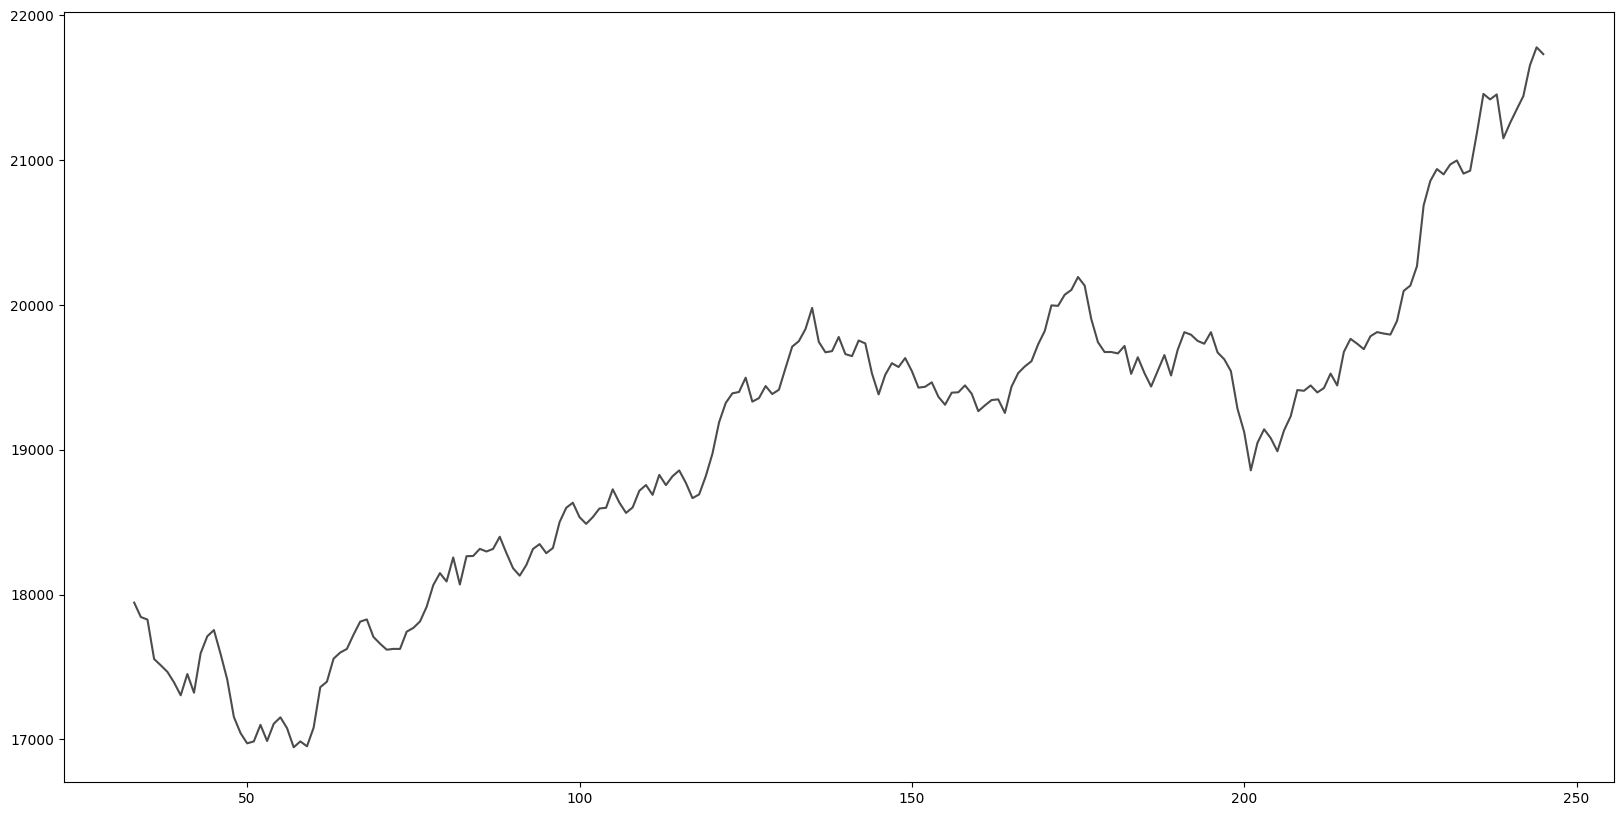

In [24]:

plt.figure(figsize=(20,10))
plt.plot(df['Close '], color= 'k', alpha = 0.7)
plt.scatter(actuals.Buying_dates, df['Open '][actuals.Buying_dates], marker= '^', color= 'g', s = 5000)
plt.scatter(actuals.Selling_dates, df['Open '][actuals.Selling_dates], marker= 'v', color= 'r', s = 5000)